In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

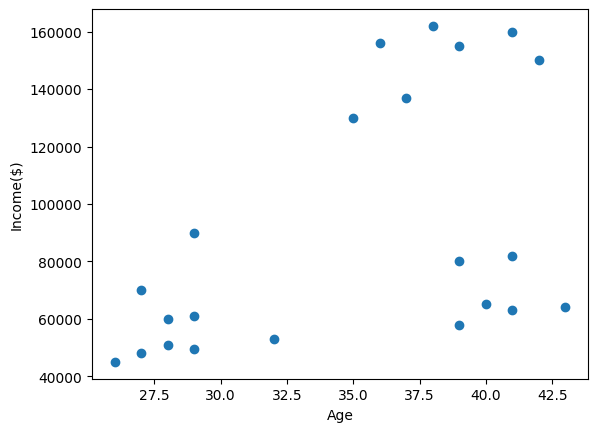

In [3]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [4]:
scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [5]:
wcss_values = []
k_range = range(1, 11)
random_state = 42

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(df[["Age", "Income($)"]])
    wcss_values.append(kmeans.inertia_)

In [6]:
wcss_values

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.3698658919234833,
 0.2829404587160481,
 0.2301425286224033,
 0.20548769627526323,
 0.1471853679399594,
 0.13246345557512865,
 0.12375328215020054]

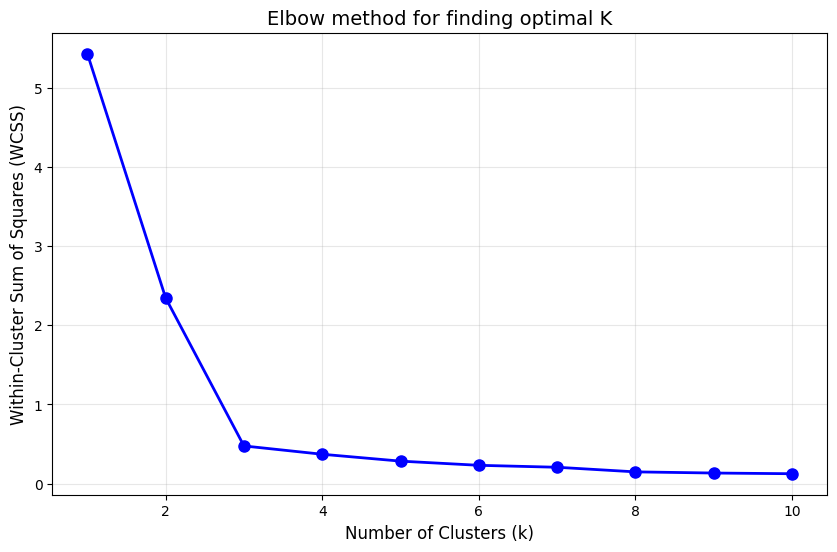

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_values, "bo-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)
plt.title("Elbow method for finding optimal K", fontsize=14)
plt.grid(True, alpha=0.3)
# plt.xticks(k_range)

In [8]:
knee = KneeLocator(k_range, wcss_values, curve="convex", direction="decreasing")
knee.elbow
k_optimal = knee.elbow if knee.elbow else 3
k_optimal

np.int64(3)

In [9]:
km = KMeans(n_clusters=k_optimal, random_state=random_state)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [11]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

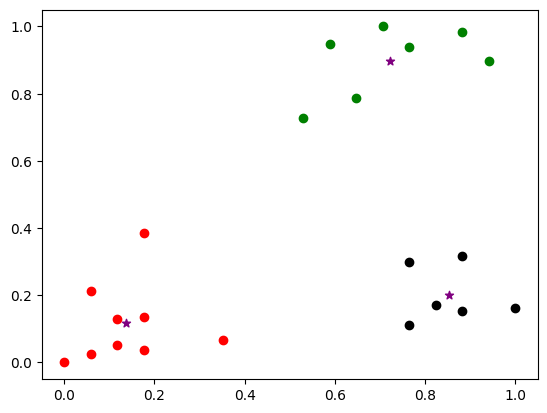

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="black")
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    color="purple",
    marker="*",
    label="centroid",
)
plt.show()